## **🛒 Market Basket Analysis**

> **📌 Pay attention**
>
> This task contains a part, that wasn't learned.\
You will need to research yourself how to make pivot tables using Pandas.

### **1️⃣ Introduction**

**Objective**: Identify products that are frequently bought together.

**Application**:
- **Retail**: Determine product bundling strategies. For example, if bread and butter have a high positive correlation, stores can place these items near each other or offer bundle deals.
- **E-commerce**: Enhance recommendation systems by suggesting items that are often purchased together.

### **2️⃣ Calculations**

Import Pandas, Matplotlib and Seaborn:

In [ ]:
# YOUR CODE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data about transactions by the following link:\
https://raw.githubusercontent.com/sca-programming-school/datasets/main/transactions.csv

In [ ]:
# YOUR CODE
df = pd.read_csv('https://raw.githubusercontent.com/sca-programming-school/datasets/main/transactions.csv')

Let's take a look at the given data. Output the first 5 rows:

In [ ]:
# YOUR CODE
df.head()

,TransactionID,Product,Amount
0,1,Apple,2
1,1,Eggs,1
2,1,Milk,2
3,2,Jam,8
4,2,Bread,3


We neeed to make a pivot table that has:
* transactions as rows
* products as columns
* amount as values

Research how to do this your own. We did not learn this, but it's not too complex, especially when you have an experience of working with pivot tables.

In [ ]:
# YOUR CODE
pivot_table = pd.pivot_table(df, values='Amount', index='TransactionID', columns='Product', aggfunc='sum')

Great! Now, let's take a look at the pivot table we have. Output the first 5 rows:

In [ ]:
# YOUR CODE
pivot_table.head()

Product,Apple,Banana,Bread,Butter,Cheese,Eggs,Jam,Milk
TransactionID,,,,,,,,
1,2.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0
2,NaN,4.0,3.0,3.0,6.0,8.0,8.0,NaN
3,NaN,3.0,NaN,NaN,9.0,NaN,1.0,NaN
4,2.0,NaN,8.0,6.0,NaN,7.0,NaN,9.0
5,5.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0


Now, we can calculate a correlation matrix based on the pivot table:

In [ ]:
# YOUR CODE
correlation_matrix = pivot_table.corr()
correlation_matrix

Product,Apple,Banana,Bread,Butter,Cheese,Eggs,Jam,Milk
Product,,,,,,,,
Apple,1.000000,NaN,-0.139345,0.001148,0.132269,-0.052866,-0.026302,0.032801
Banana,NaN,1.000000,0.026679,-0.142879,0.080064,0.032218,-0.107958,0.029713
Bread,-0.139345,0.026679,1.000000,0.040019,0.019998,-0.031111,-0.030365,0.109286
Butter,0.001148,-0.142879,0.040019,1.000000,-0.130206,-0.028594,-0.055296,0.107762
Cheese,0.132269,0.080064,0.019998,-0.130206,1.000000,-0.051380,0.011983,NaN
Eggs,-0.052866,0.032218,-0.031111,-0.028594,-0.051380,1.000000,0.065115,-0.005213
Jam,-0.026302,-0.107958,-0.030365,-0.055296,0.011983,0.065115,1.000000,NaN
Milk,0.032801,0.029713,0.109286,0.107762,NaN,-0.005213,NaN,1.000000


Finally, let's visualise this correlation matrix using Seaborn heatmap.

Set the title **"Product Correlation Matrix"** to the chart.

Text(0.5, 1.0, 'Product Correlation Matrix')

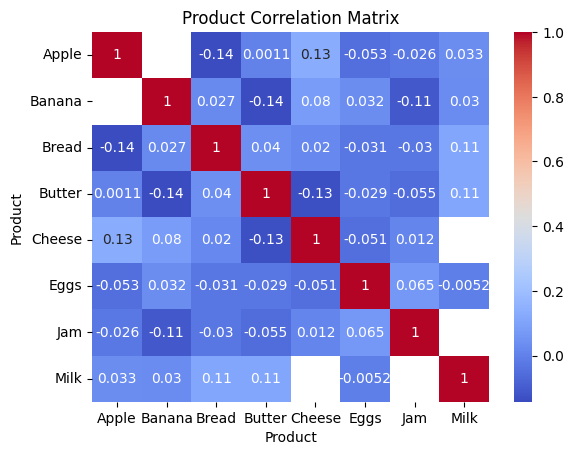

In [ ]:
# YOUR CODE
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Product Correlation Matrix')

### **3️⃣ Insights & Conclusions**

👉 Correlation values range from -0.14 to 0.13, indicating that the relationships between the products are very weak or virtually nonexistent.  
👉 No product pairs exhibit strong or moderate correlation, indicating that customers tend to purchase items relatively independently.  
👉 However, weak correlations observed in pairs such as ***Bread – Milk (0.11), Apple – Cheese (0.13), Butter – Milk (0.11), and Banana – Cheese (0.08)*** may still be leveraged for **light cross-selling strategies or bundled promotions**.

> **📌 Note that!**
>
> It is considered <u>good practice to examine correlations for all columns one by one</u>.\
This is crucial because, in analysis, even the absence of correlation is significant. The lack of a relationship between two variables is also a useful observation from which conclusions can and sometimes should be drawn.